### Import Packages

In [1]:
!pip install numpy-financial

In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

### Set Up the Financial Assumptions

In [2]:
# Initial investment cost of the equipment and production estimates
costEquipment = 750000

# Number of years to generate revenue
numberOfYears = 5 

# Total number of years in the model
totalYear = numberOfYears+1

# Business assumptions
COGSpercent = 0.375
salariesBenefits = 160427
salariesBenefits0 = 82750
otherCost = 10963
workingCapital = 9003 
tax = 0.25

# Production assumptions
price_mean = 25
price_std = 0.5

units_mean = 35000
units_std = 2000

# Discount rate 
discRate_mean = 0.15
discRate_std = 0.02

### Simulate Variables 

[24.4571847  25.49867272 25.14148925 ... 24.76386679 25.29098218
 25.48530643]
[32518.06065558 34374.10642993 33302.1064165  ... 32194.32036611
 37089.08172498 35738.56223552]
[0.17063187 0.1766389  0.15191688 ... 0.12710549 0.14052637 0.18319834]


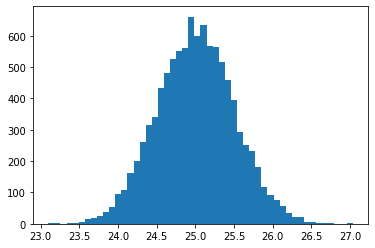

In [3]:
# Set up random seed for reproducibility
np.random.seed(123) 

# Number of simulations
simulations = 10000

# Simulate the price, units, and discount rate
price_sim = np.random.normal(price_mean, price_std, simulations)
units_sim = np.random.normal(units_mean, units_std, simulations)
discRate_sim = np.random.normal(discRate_mean, discRate_std, simulations)

# Examine the simulations
print(price_sim)
print(units_sim)
print(discRate_sim)

plt.hist(price_sim, 50)
plt.show()

### Simulate the Free Cash Flow (FCF) and Net Present Value (NPV)

In [4]:
# Create a list of ones
all_years_constant = np.ones(totalYear)
all_years_constant

array([1., 1., 1., 1., 1., 1.])

In [5]:
# Create a list to contain all NPV simulations
npv=[]

# Create a for loop to go through 10,000 simulations
for i in np.arange(simulations):
        
    # Sales from year 0 to year 5 
    units=all_years_constant*units_sim[i]
    sales=units*price_sim[i]
    sales[0]=0  
    
    # COGS from year 0 to year 5
    COGS=sales*COGSpercent
    
    # Salaries from year 0 to year 5
    salaries=all_years_constant*salariesBenefits
    salaries[0]=salariesBenefits0
    
    # Other expenses from year 0 to year 5
    other=all_years_constant*otherCost
    other[0]=0
    
    # Depreciation from year 0 to year 5
    depreciation=all_years_constant*costEquipment/numberOfYears   
    depreciation[0]=0                            
    
    # Net increase in working capital from year 0 to year 5
    WC=all_years_constant*workingCapital
    WC[0]=0
    
    # Equipment cost from year 0 to year 5
    equipment=np.zeros(totalYear) 
    equipment[0]=costEquipment 
    
    # Calculate EBIT
    EBIT=sales-COGS-salaries-other-depreciation 
    
    # Calculate NOPAT(net operating profit after taxes)
    NOPAT=EBIT*(1-tax)                   
    
    # Calculate FCF (free cash flow)
    FCF=NOPAT+depreciation-WC-equipment
    
    # Calculate NPV
    R=discRate_sim[i]
    npvProject=npf.npv(R,FCF)/1000
    
    # Add npvProject to the list of all NPV simulations
    npv.append(npvProject)

### Analyze the Profitability of the Investment

min  NPV = -90.0
mean NPV = 231.0
max  NPV = 654.0


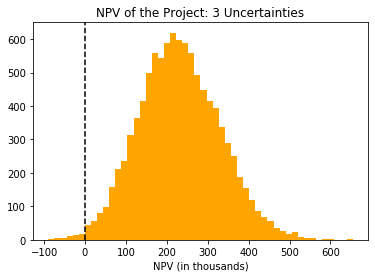

In [6]:
# pint the minimum, average and maximum NPV
print("min  NPV =",round(min(npv)))
print("mean NPV =",round(np.mean(npv)))
print("max  NPV =",round(max(npv)))

# Plot the data distribution
plt.hist(npv, 50, color='orange')
plt.title("NPV of the Project: 3 Uncertainties")
plt.xlabel("NPV (in thousands)")
plt.axvline(0, color = 'k', linestyle='dashed')
plt.show()